# PTA UNIVERSITAS TRUNOJOYO MADURA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

Import Data

In [4]:
data = '/content/drive/MyDrive/PPW/pta-infor.csv'
df = pd.read_csv(data, delimiter=';')

df

,Judul,Nama Penulis,Pembimbing I,Pembimbing II,Abstrak,Prodi,Kelas
0,Gerak Pekerja Pada Game Real Time Strategy Men...,Adi Chandra Laksono,"Kurniawan Eka P, S.Kom., Msc","Arik Kurniawati, S.Kom., M.T.",Gerak pekerja ada pada game yang memiliki genr...,Jurusan Teknik Informatika,RPL
1,RANCANG BANGUN GAME PERAWATAN SAPI KARAPAN MEN...,NURRACHMAT,"Arik Kurniawati, S.Kom., M.T.","Kurniawan Eka Permana, S.Kom., MSc.","Perkembangan game yang semakin pesat, memberik...",Jurusan Teknik Informatika,RPL
2,EKSTRAKSI FITUR BERBASIS TWO DIMENSIONAL LINEA...,Muhammad Choirur Rozi,"Dr. Arif Muntasa, S.Si.,M.T","Fitri Damayanti, S.Kom.,M.kom",Sistem pengenalan wajah adalah suatu sistem un...,Jurusan Teknik Informatika,Komputasi
3,IMPLEMENTASI ALGORITMA PRIM DAN DEPTH FIRST ...,M Khoiril Anwar,"Cucun Very Angkoso, S.T., M.T.","Arik Kurniawati S. Kom., M.T.",Teknologi mobile game beroperating system open...,Jurusan Teknik Informatika,Komputasi
4,Perancangan Sistem Informasi Badan Kepegawaian...,MALIKUL HAMZAH,"Moch. Kautsar Sophan, S.Kom., M.MT.","Yeni Kustiyaningsih, S.Kom., M.Kom.",Kantor Badan Kepegawaian kota Bangkalan adalah...,Jurusan Teknik Informatika,RPL
...,...,...,...,...,...,...,...
848,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...,Jurusan Teknik Informatika,Komputasi
849,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...,Jurusan Teknik Informatika,Komputasi
850,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...,Jurusan Teknik Informatika,Komputasi
851,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...,Jurusan Teknik Informatika,Komputasi


Pre-Processing

Cek Data Kosong

In [5]:
df.isnull().sum()

Judul             6
Nama Penulis      0
Pembimbing I      0
Pembimbing II     9
Abstrak          31
Prodi             1
Kelas             0
dtype: int64

Hapus Data Kosong

In [6]:
df.dropna(inplace=True)

Cleansing Data

In [7]:
import re, string

# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub("â", "", text)

    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

Implementasi Fungsi Pada Abstrak

In [8]:
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))
df.head()

,Judul,Nama Penulis,Pembimbing I,Pembimbing II,Abstrak,Prodi,Kelas
0,Gerak Pekerja Pada Game Real Time Strategy Men...,Adi Chandra Laksono,"Kurniawan Eka P, S.Kom., Msc","Arik Kurniawati, S.Kom., M.T.",gerak pekerja ada pada game yang memiliki genr...,Jurusan Teknik Informatika,RPL
1,RANCANG BANGUN GAME PERAWATAN SAPI KARAPAN MEN...,NURRACHMAT,"Arik Kurniawati, S.Kom., M.T.","Kurniawan Eka Permana, S.Kom., MSc.",perkembangan game yang semakin pesat memberika...,Jurusan Teknik Informatika,RPL
2,EKSTRAKSI FITUR BERBASIS TWO DIMENSIONAL LINEA...,Muhammad Choirur Rozi,"Dr. Arif Muntasa, S.Si.,M.T","Fitri Damayanti, S.Kom.,M.kom",sistem pengenalan wajah adalah suatu sistem un...,Jurusan Teknik Informatika,Komputasi
3,IMPLEMENTASI ALGORITMA PRIM DAN DEPTH FIRST ...,M Khoiril Anwar,"Cucun Very Angkoso, S.T., M.T.","Arik Kurniawati S. Kom., M.T.",teknologi mobile game beroperating system open...,Jurusan Teknik Informatika,Komputasi
4,Perancangan Sistem Informasi Badan Kepegawaian...,MALIKUL HAMZAH,"Moch. Kautsar Sophan, S.Kom., M.MT.","Yeni Kustiyaningsih, S.Kom., M.Kom.",kantor badan kepegawaian kota bangkalan adalah...,Jurusan Teknik Informatika,RPL


Tokenize Data

> Memisahkan sebuah dokumen menjadi susunan perkata/term



Import Libary NLTK

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

Implementasi Libary

In [10]:
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,gerak pekerja ada pada game yang memiliki genr...,"[gerak, pekerja, ada, pada, game, yang, memili..."
1,perkembangan game yang semakin pesat memberika...,"[perkembangan, game, yang, semakin, pesat, mem..."
2,sistem pengenalan wajah adalah suatu sistem un...,"[sistem, pengenalan, wajah, adalah, suatu, sis..."
3,teknologi mobile game beroperating system open...,"[teknologi, mobile, game, beroperating, system..."
4,kantor badan kepegawaian kota bangkalan adalah...,"[kantor, badan, kepegawaian, kota, bangkalan, ..."


Stop Word

> Mengubah isi dari dokumen sesuai dengan corpus



Import Libary NLTK Stopwords

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Implementasi Pada Data

In [12]:
from nltk.corpus import stopwords
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian')))
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

In [13]:
df['Abstrak'] = df['abstrak_tokens'].apply(lambda tokens: ' '.join(tokens))

In [14]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,gerak pekerja game memiliki genre rts real tim...,"[gerak, pekerja, game, memiliki, genre, rts, r..."
1,perkembangan game pesat alternative peminatnya...,"[perkembangan, game, pesat, alternative, pemin..."
2,sistem pengenalan wajah sistem mengenali ident...,"[sistem, pengenalan, wajah, sistem, mengenali,..."
3,teknologi mobile game beroperating system open...,"[teknologi, mobile, game, beroperating, system..."
4,kantor badan kepegawaian kota bangkalan instan...,"[kantor, badan, kepegawaian, kota, bangkalan, ..."


Stemming

> Mengubah kata menjadi bentuk paling dasar



Import Libary Sastrawi

In [15]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.4 MB/s eta 0:00:00


Implementasi Pada Data

In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [17]:
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/821 [00:00<?, ?it/s]

In [18]:
df['Abstrak'] = df['abstrak_tokens'].apply(lambda tokens: ' '.join(tokens))

In [19]:
df

,Judul,Nama Penulis,Pembimbing I,Pembimbing II,Abstrak,Prodi,Kelas,abstrak_tokens
0,Gerak Pekerja Pada Game Real Time Strategy Men...,Adi Chandra Laksono,"Kurniawan Eka P, S.Kom., Msc","Arik Kurniawati, S.Kom., M.T.",gerak kerja game milik genre rts real time str...,Jurusan Teknik Informatika,RPL,"[gerak, kerja, game, milik, genre, rts, real, ..."
1,RANCANG BANGUN GAME PERAWATAN SAPI KARAPAN MEN...,NURRACHMAT,"Arik Kurniawati, S.Kom., M.T.","Kurniawan Eka Permana, S.Kom., MSc.",kembang game pesat alternative minat bentuk ga...,Jurusan Teknik Informatika,RPL,"[kembang, game, pesat, alternative, minat, ben..."
2,EKSTRAKSI FITUR BERBASIS TWO DIMENSIONAL LINEA...,Muhammad Choirur Rozi,"Dr. Arif Muntasa, S.Si.,M.T","Fitri Damayanti, S.Kom.,M.kom",sistem kenal wajah sistem nali identitas wajah...,Jurusan Teknik Informatika,Komputasi,"[sistem, kenal, wajah, sistem, nali, identitas..."
3,IMPLEMENTASI ALGORITMA PRIM DAN DEPTH FIRST ...,M Khoiril Anwar,"Cucun Very Angkoso, S.T., M.T.","Arik Kurniawati S. Kom., M.T.",teknologi mobile game beroperating system open...,Jurusan Teknik Informatika,Komputasi,"[teknologi, mobile, game, beroperating, system..."
4,Perancangan Sistem Informasi Badan Kepegawaian...,MALIKUL HAMZAH,"Moch. Kautsar Sophan, S.Kom., M.MT.","Yeni Kustiyaningsih, S.Kom., M.Kom.",kantor badan pegawai kota bangkal instansi per...,Jurusan Teknik Informatika,RPL,"[kantor, badan, pegawai, kota, bangkal, instan..."
...,...,...,...,...,...,...,...,...
848,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",investasi saham milik resiko rugi dikarenakanp...,Jurusan Teknik Informatika,Komputasi,"[investasi, saham, milik, resiko, rugi, dikare..."
849,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",information retrieval ir ambil informasi simpa...,Jurusan Teknik Informatika,Komputasi,"[information, retrieval, ir, ambil, informasi,..."
850,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",klasifikasi citra proses kelompok piksel citra...,Jurusan Teknik Informatika,Komputasi,"[klasifikasi, citra, proses, kelompok, piksel,..."
851,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",identifikasi atribut pejal kaki salah teliti k...,Jurusan Teknik Informatika,Komputasi,"[identifikasi, atribut, pejal, kaki, salah, te..."


In [20]:
# df.to_csv('DataSteaming.csv', index=False)

Ekstraksi Fitur

Term Frequency

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(np.array(df['Abstrak']))

terms_count = count_vectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = X_count.toarray(),columns = terms_count)
# df_countvect
df_countvect['Kelas'] = df['Kelas'].values

In [22]:
token_counts = df_countvect.sum(axis=0)

non_zero_token_counts = token_counts[token_counts != 0]

print("Token Counts yang Tidak Sama dengan 0:")
print(non_zero_token_counts)

Token Counts yang Tidak Sama dengan 0:
aalysis                                                    1
aam                                                        2
abad                                                       2
abadi                                                      2
abai                                                       1
                                 ...                        
zoning                                                     4
zoom                                                       3
zucara                                                     1
zungu                                                      1
Kelas      RPLRPLKomputasiKomputasiRPLRPLKomputasiKomputa...
Length: 6522, dtype: object


In [23]:
#df_countvect.to_csv('Data_CountVectorize.csv', index=False)

One Hot Encoding

In [24]:
df_numeric = df_countvect.apply(pd.to_numeric, errors='coerce')
df_binary = df_numeric.applymap(lambda x: 1 if x > 0 else 0)

df_binary

,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu,Kelas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#df_binary.to_csv('Data_OneHotEncoder.csv', index=False)

TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['Abstrak'].tolist())

terms = vectorizer.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = X_tfidf.toarray(),columns = terms)
df_tfidfvect

,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#df_tfidfvect.to_csv('Data_TF-IDF.csv', index=False)

Bobot Kata Dalam Setiap Dokumen

In [28]:
df_tfidf = pd.DataFrame(X_tfidf.todense().T,
                        index = terms,
                        columns = [f'D{i+1}' for i in range(len(df['Abstrak']))])
df_tfidf

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D812,D813,D814,D815,D816,D817,D818,D819,D820,D821
aalysis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
aam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
abad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.07132,0.0,0.0,0.0,0.0,0.0,0.0
abadi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
abai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
zoning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
zoom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
zucara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
token_counts = df_tfidf.sum(axis=0)

non_zero_token_counts = token_counts[token_counts != 0]

print("Token Counts yang Tidak Sama dengan 0:")
print(non_zero_token_counts)

Token Counts yang Tidak Sama dengan 0:
D1      5.031323
D2      4.600343
D3      5.075196
D4      4.769713
D5      5.382139
          ...   
D817    6.987218
D818    6.416088
D819    6.865016
D820    5.757383
D821    6.816461
Length: 816, dtype: float64


Log Frequency

In [30]:
df_numeric = df_countvect.apply(pd.to_numeric, errors='coerce')
df_log = df_numeric.applymap(lambda x: np.log1p(x) if x > 0 else 0)

df_log

,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu,Kelas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [31]:
#df_log.to_csv('Data_LogFrekuensi.csv', index=False)

Skip Gram

In [32]:
import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts
import pandas as pd

sentences = df['abstrak_tokens'].tolist()

model = Word2Vec(sentences, vector_size=100, window=1, sg=1, epochs=1)

word = "machine"
similar_words = model.wv.most_similar(word)

print(f"Kata yang mirip dengan '{word}':")
for w, sim in similar_words:
    print(f"{w}: {sim:.4f}")

Kata yang mirip dengan 'machine':
bola: 0.5415
produksi: 0.5386
factor: 0.5382
content: 0.5379
jam: 0.5374
tim: 0.5353
kertas: 0.5333
non: 0.5327
alam: 0.5321
akademik: 0.5308


In [33]:
import gensim
from gensim.models import Word2Vec
import pandas as pd

sentences = df['abstrak_tokens'].tolist()

model = Word2Vec(sentences, vector_size=100, window=1, sg=1, epochs=1)

word = "machine"
context_words = []

if word in model.wv:
    word_vector = model.wv[word]
    similar_words = model.wv.most_similar([word_vector], topn=3)
    context_words = [w for w, _ in similar_words]

print(f"Kata-kata dalam konteks window=1 untuk '{word}':")
for w in context_words:
    print(w)

Kata-kata dalam konteks window=1 untuk 'machine':
machine
factor
content


In [34]:
import gensim
from gensim.models import Word2Vec

model = Word2Vec(sentences, vector_size=100, window=1, sg=1, epochs=1)

word1 = "gerak"
word2 = "sistem"

if word1 in model.wv and word2 in model.wv:
    vector1 = model.wv[word1]
    vector2 = model.wv[word2]
    similarity = model.wv.cosine_similarities(vector1, [vector2])[0]

    print(f"Kesamaan kosakata antara '{word1}' dan '{word2}': {similarity:.4f}")
else:
    print("Salah satu atau kedua kata tidak ada dalam model.")

Kesamaan kosakata antara 'gerak' dan 'sistem': 0.8947


LDA Modelling

In [35]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

Modelling Data

*   k = 3
*   alpha = 0.1
*   beta = 0.2



In [36]:
lda_model = LatentDirichletAllocation(n_components=3, doc_topic_prior=0.1, topic_word_prior=0.2, random_state=42)
# w1 = lda_model.fit_transform(X_tfidf)
w1 = lda_model.fit_transform(X_count)
h1 = lda_model.components_

In [37]:
w1

array([[1.26145731e-03, 2.17900831e-01, 7.80837712e-01],
       [4.39064485e-02, 1.11998592e-03, 9.54973566e-01],
       [8.59969799e-04, 7.47164858e-01, 2.51975172e-01],
       ...,
       [6.39923712e-04, 8.30026382e-01, 1.69333694e-01],
       [4.68920391e-02, 9.52322277e-01, 7.85683609e-04],
       [1.12010793e-03, 8.60141498e-01, 1.38738394e-01]])

Proporsi Topik Pada Dokumen

In [38]:
num_word = 100
vocab = np.array(terms)
top_word = lambda t: [vocab[i] for i in np.argsort(t)[:-num_word-1:-1]]
topic_word = ([top_word(t) for t in h1])
topic = [' '.join(t) for t in topic_word]

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Kelas'] = label_encoder.fit_transform(df['Kelas'])
df

,Judul,Nama Penulis,Pembimbing I,Pembimbing II,Abstrak,Prodi,Kelas,abstrak_tokens
0,Gerak Pekerja Pada Game Real Time Strategy Men...,Adi Chandra Laksono,"Kurniawan Eka P, S.Kom., Msc","Arik Kurniawati, S.Kom., M.T.",gerak kerja game milik genre rts real time str...,Jurusan Teknik Informatika,2,"[gerak, kerja, game, milik, genre, rts, real, ..."
1,RANCANG BANGUN GAME PERAWATAN SAPI KARAPAN MEN...,NURRACHMAT,"Arik Kurniawati, S.Kom., M.T.","Kurniawan Eka Permana, S.Kom., MSc.",kembang game pesat alternative minat bentuk ga...,Jurusan Teknik Informatika,2,"[kembang, game, pesat, alternative, minat, ben..."
2,EKSTRAKSI FITUR BERBASIS TWO DIMENSIONAL LINEA...,Muhammad Choirur Rozi,"Dr. Arif Muntasa, S.Si.,M.T","Fitri Damayanti, S.Kom.,M.kom",sistem kenal wajah sistem nali identitas wajah...,Jurusan Teknik Informatika,1,"[sistem, kenal, wajah, sistem, nali, identitas..."
3,IMPLEMENTASI ALGORITMA PRIM DAN DEPTH FIRST ...,M Khoiril Anwar,"Cucun Very Angkoso, S.T., M.T.","Arik Kurniawati S. Kom., M.T.",teknologi mobile game beroperating system open...,Jurusan Teknik Informatika,1,"[teknologi, mobile, game, beroperating, system..."
4,Perancangan Sistem Informasi Badan Kepegawaian...,MALIKUL HAMZAH,"Moch. Kautsar Sophan, S.Kom., M.MT.","Yeni Kustiyaningsih, S.Kom., M.Kom.",kantor badan pegawai kota bangkal instansi per...,Jurusan Teknik Informatika,2,"[kantor, badan, pegawai, kota, bangkal, instan..."
...,...,...,...,...,...,...,...,...
848,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",investasi saham milik resiko rugi dikarenakanp...,Jurusan Teknik Informatika,1,"[investasi, saham, milik, resiko, rugi, dikare..."
849,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",information retrieval ir ambil informasi simpa...,Jurusan Teknik Informatika,1,"[information, retrieval, ir, ambil, informasi,..."
850,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",klasifikasi citra proses kelompok piksel citra...,Jurusan Teknik Informatika,1,"[klasifikasi, citra, proses, kelompok, piksel,..."
851,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",identifikasi atribut pejal kaki salah teliti k...,Jurusan Teknik Informatika,1,"[identifikasi, atribut, pejal, kaki, salah, te..."


In [40]:
colnames = ["Topic" + str(i) for i in range(lda_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(df['Abstrak']))]
df_doc_topic = pd.DataFrame(np.round(w1,2),columns=colnames,index=docnames)
df_doc_topic['Kelas'] = df['Kelas'].values

In [41]:
df_doc_topic

,Topic0,Topic1,Topic2,Kelas
Doc0,0.00,0.22,0.78,2
Doc1,0.04,0.00,0.95,2
Doc2,0.00,0.75,0.25,1
Doc3,0.00,0.00,1.00,1
Doc4,0.73,0.00,0.27,2
...,...,...,...,...
Doc816,0.32,0.68,0.00,1
Doc817,0.00,0.89,0.11,1
Doc818,0.00,0.83,0.17,1
Doc819,0.05,0.95,0.00,1


In [42]:
df_doc_topic.shape

(821, 4)

In [43]:
df_tfidfvect.shape

(821, 6521)

In [44]:
doc_topic_proportions = lda_model.transform(X_tfidf)

for i, doc in enumerate(df['Abstrak']):
    print(f"Dokumen {i+1}:")
    for j, topic_prob in enumerate(doc_topic_proportions[i]):
        print(f"Topik {j+1}: {topic_prob:.4f}")
    print()

Dokumen 1:
Topik 1: 0.0188
Topik 2: 0.2469
Topik 3: 0.7344

Dokumen 2:
Topik 1: 0.0204
Topik 2: 0.0204
Topik 3: 0.9592

Dokumen 3:
Topik 1: 0.0186
Topik 2: 0.6950
Topik 3: 0.2864

Dokumen 4:
Topik 1: 0.0197
Topik 2: 0.0197
Topik 3: 0.9605

Dokumen 5:
Topik 1: 0.9647
Topik 2: 0.0176
Topik 3: 0.0177

Dokumen 6:
Topik 1: 0.9660
Topik 2: 0.0170
Topik 3: 0.0170

Dokumen 7:
Topik 1: 0.9696
Topik 2: 0.0152
Topik 3: 0.0152

Dokumen 8:
Topik 1: 0.4251
Topik 2: 0.5559
Topik 3: 0.0191

Dokumen 9:
Topik 1: 0.2644
Topik 2: 0.0179
Topik 3: 0.7177

Dokumen 10:
Topik 1: 0.0181
Topik 2: 0.9638
Topik 3: 0.0181

Dokumen 11:
Topik 1: 0.9667
Topik 2: 0.0167
Topik 3: 0.0167

Dokumen 12:
Topik 1: 0.0191
Topik 2: 0.5747
Topik 3: 0.4062

Dokumen 13:
Topik 1: 0.0212
Topik 2: 0.9576
Topik 3: 0.0212

Dokumen 14:
Topik 1: 0.0133
Topik 2: 0.9734
Topik 3: 0.0133

Dokumen 15:
Topik 1: 0.0128
Topik 2: 0.6144
Topik 3: 0.3729

Dokumen 16:
Topik 1: 0.1125
Topik 2: 0.8735
Topik 3: 0.0140

Dokumen 17:
Topik 1: 0.0179
Topik

In [45]:
topic_word_distributions = lda_model.components_

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(topic_word_distributions):
    top_words_idx = topic.argsort()[::-1][:10]  # Ambil 10 kata teratas
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topik {topic_idx}:")
    print(", ".join(top_words))
    print()


Topik 0:
sistem, hasil, metode, data, nilai, putus, teliti, tingkat, tentu, dasar

Topik 1:
citra, metode, hasil, teliti, proses, akurasi, fitur, sakit, uji, sistem

Topik 2:
ajar, aplikasi, game, sistem, hasil, data, kembang, informasi, proses, teliti



Proporsi Topik Pada Kata

In [46]:
topic_word_propotion = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]

df_topic_word = pd.DataFrame(data=topic_word_propotion, columns=terms)
df_topic_word = df_topic_word.transpose().reset_index()
df_topic_word = df_topic_word.rename(columns={'index': 'Kata'})
df_topic_word

,Kata,0,1,2
0,aalysis,0.000014,0.000009,0.000034
1,aam,0.000059,0.000009,0.000008
2,abad,0.000032,0.000009,0.000046
3,abadi,0.000006,0.000009,0.000084
4,abai,0.000032,0.000009,0.000008
...,...,...,...,...
6516,zone,0.000086,0.000009,0.000008
6517,zoning,0.000113,0.000009,0.000008
6518,zoom,0.000005,0.000009,0.000122
6519,zucara,0.000005,0.000009,0.000046


Akurasi Dengan 3 Topik

Naive Bayes

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = df_doc_topic.drop('Kelas', axis=1)
y = df_doc_topic['Kelas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [48]:
df_doc_topic.shape

(821, 4)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi: 0.7333333333333333
Laporan Klasifikasi:
              precision    recall  f1-score   support

           1       0.81      0.59      0.68        80
           2       0.69      0.87      0.77        85

    accuracy                           0.73       165
   macro avg       0.75      0.73      0.73       165
weighted avg       0.75      0.73      0.73       165



KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
neigh = KNeighborsClassifier(n_neighbors=3)
knn = neigh.fit(X_train, y_train)

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print("Akurasi:", accuracy)

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_knn))

Akurasi: 0.7272727272727273
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.75      0.65      0.70        80
           2       0.72      0.80      0.76        85

    accuracy                           0.73       165
   macro avg       0.49      0.48      0.49       165
weighted avg       0.74      0.73      0.73       165



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [53]:
from sklearn import tree

In [54]:
clf = tree.DecisionTreeClassifier()
decision_tree = clf.fit(X_train, y_train)

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_clf = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_clf)
print("Akurasi:", accuracy)

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_clf))

Akurasi: 0.7090909090909091
Laporan Klasifikasi:
              precision    recall  f1-score   support

           1       0.74      0.62      0.68        80
           2       0.69      0.79      0.74        85

    accuracy                           0.71       165
   macro avg       0.71      0.71      0.71       165
weighted avg       0.71      0.71      0.71       165



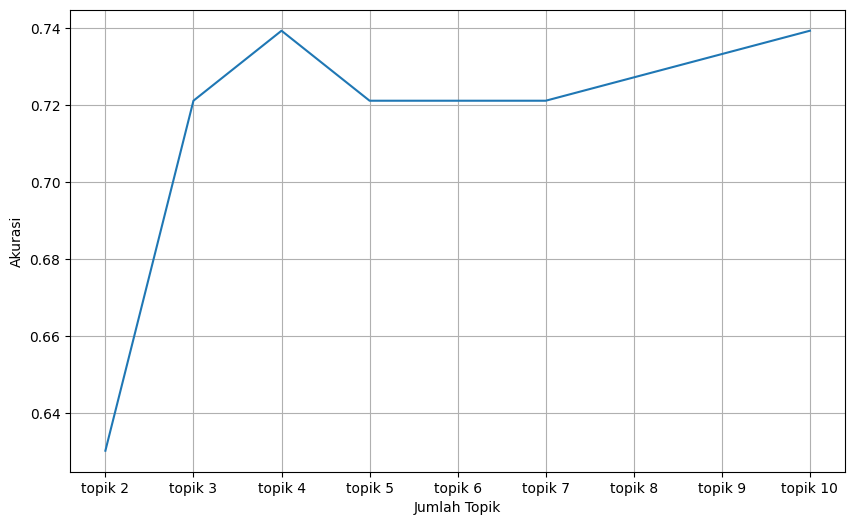

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

results = []

for n in range(2, 11):
    # Membuat dan melatih model LDA dengan nilai 'n' yang sesuai
    lda_model = LatentDirichletAllocation(n_components=n, doc_topic_prior=0.1, topic_word_prior=0.2, random_state=42)
    X_lda = lda_model.fit_transform(X)

    # Membagi data menjadi train dan test set
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

    # Membuat dan melatih model Naive Bayes
    naive_bayes_classifier = MultinomialNB()
    naive_bayes_classifier.fit(X_train, y_train)

    # Evaluasi model atau lakukan tindakan lain yang Anda inginkan
    accuracy = naive_bayes_classifier.score(X_test, y_test)
    results.append({'n_components': n, 'accuracy': accuracy})

results_df = pd.DataFrame(results)

# Rename the n_components values to "topik 2," "topik 3," and so on
results_df['n_components'] = ['topik ' + str(n) for n in results_df['n_components']]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['n_components'], results_df['accuracy'])
plt.xlabel('Jumlah Topik')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()